Iniciamos baixando dois conjuntos de dados para visualizar a estacionariedade (ou não)

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2023-08-28 16:55:42--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6220 (6.1K) [text/plain]
Saving to: ‘daily-total-female-births.csv’

daily-total-female- 100%[===================>]   6.07K  --.-KB/s    in 0s      

2023-08-28 16:55:42 (61.8 MB/s) - ‘daily-total-female-births.csv’ saved [6220/6220]

--2023-08-28 16:55:42--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Vamos começar com o de nascimento de bebês do sexo feminino

<Axes: xlabel='Date'>

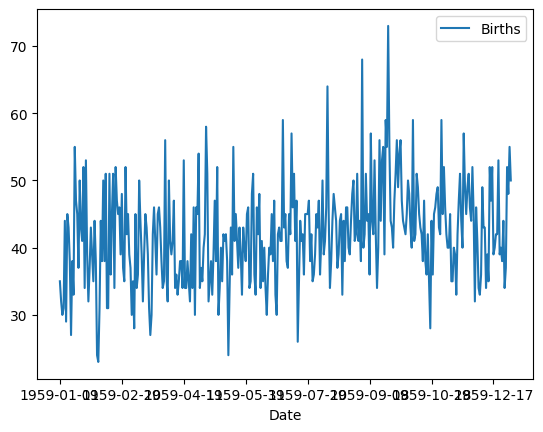

In [ ]:
df = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
df.plot()

In [ ]:
ts = df.values
ts.shape

(365, 1)

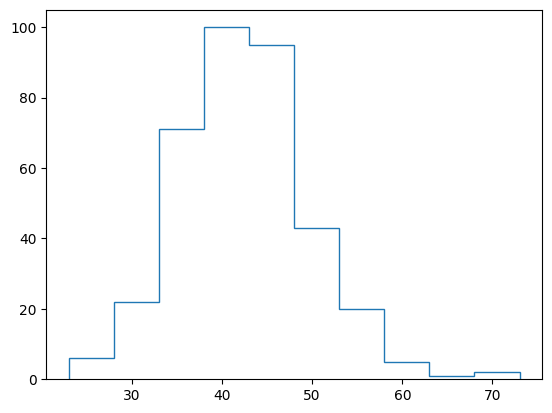

In [ ]:
counts, bins = np.histogram(ts)
plt.stairs(counts, bins)

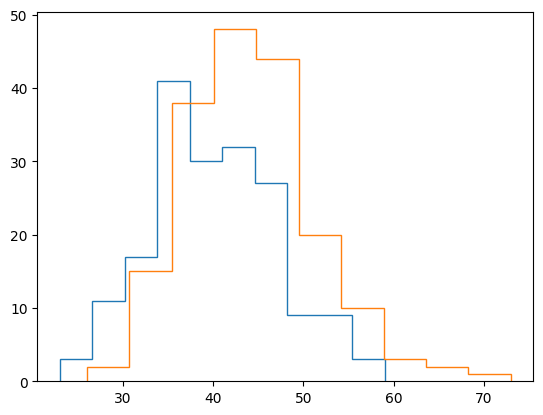

In [ ]:
counts, bins = np.histogram(ts[:(int)(ts.size/2)])
counts2, bins2 = np.histogram(ts[(int)(ts.size/2):])
plt.stairs(counts, bins)
plt.stairs(counts2, bins2)
plt.show()

Teste de augmented Dickey-Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf, p_value, nlags, _, cvs, _ = adfuller(ts)

In [ ]:
adf

-4.808291253559765

In [ ]:
p_value

5.2434129901498554e-05

Replicando para a venda de passagens aéreas

<Axes: xlabel='Month'>

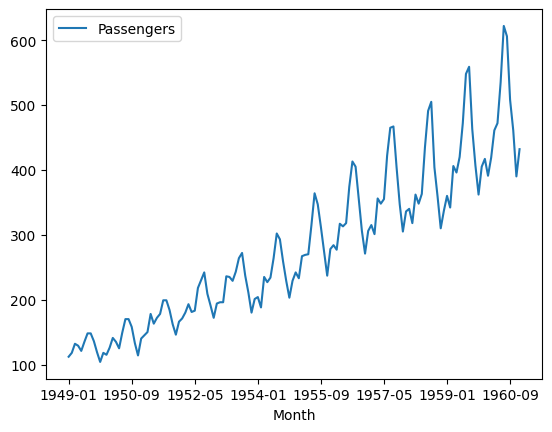

In [ ]:
df = pd.read_csv('airline-passengers.csv', header=0, index_col=0)
df.plot()

In [ ]:
ts = df.values
ts.shape

(144, 1)

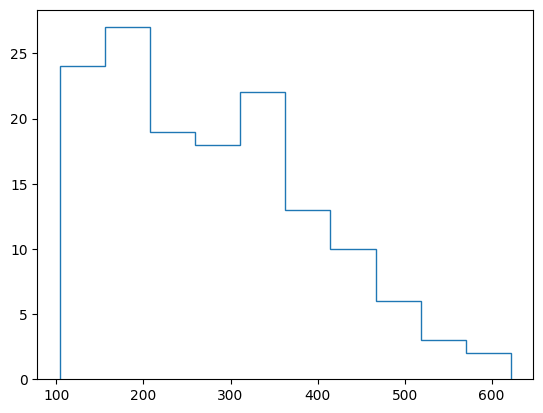

In [ ]:
counts, bins = np.histogram(ts)
plt.stairs(counts, bins)

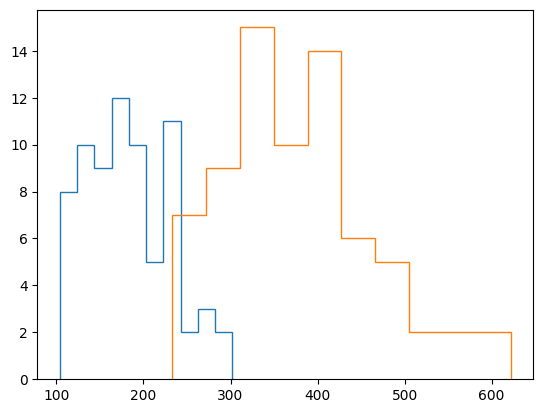

In [ ]:
counts, bins = np.histogram(ts[:(int)(ts.size/2)])
counts2, bins2 = np.histogram(ts[(int)(ts.size/2):])
plt.stairs(counts, bins)
plt.stairs(counts2, bins2)
plt.show()

Teste de augmented Dickey-Fuller

In [ ]:
adf, p_value, nlags, _, cvs, _ = adfuller(ts)

In [ ]:
adf

0.8153688792060498

In [ ]:
p_value

0.991880243437641

Diferenciando

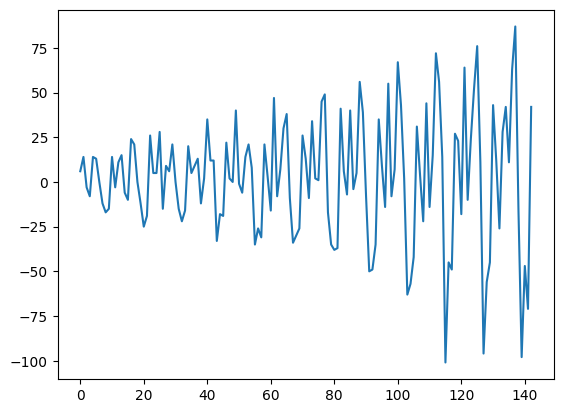

In [ ]:
ts = np.diff(df.values,axis=0)
plt.plot(ts)

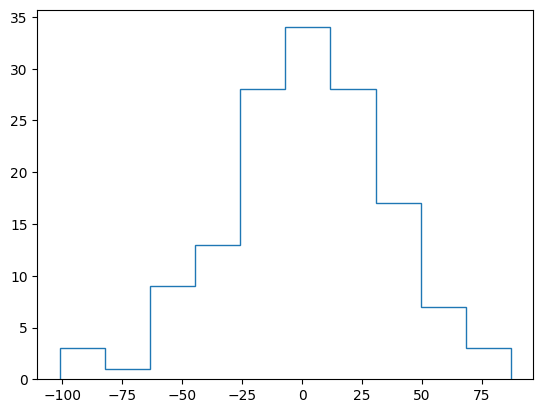

In [ ]:
counts, bins = np.histogram(ts)
plt.stairs(counts, bins)

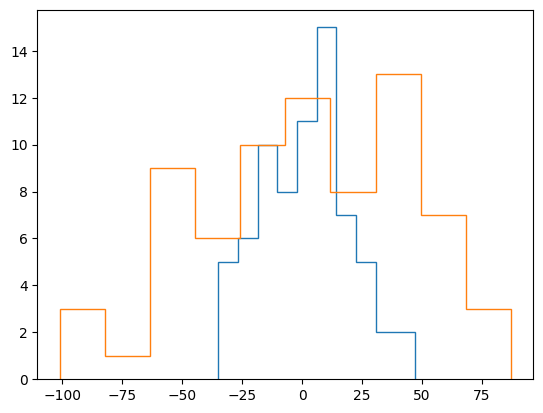

In [ ]:
counts, bins = np.histogram(ts[:(int)(ts.size/2)])
counts2, bins2 = np.histogram(ts[(int)(ts.size/2):])
plt.stairs(counts, bins)
plt.stairs(counts2, bins2)
plt.show()

Teste de augmented Dickey-Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf, p_value, nlags, _, cvs, _ = adfuller(ts)

In [ ]:
adf

-2.8292668241700047

In [ ]:
p_value

0.05421329028382478